# <center><strong> Vlib (Bike rental) </strong></center>

###### **By Mohamed Jamyl**

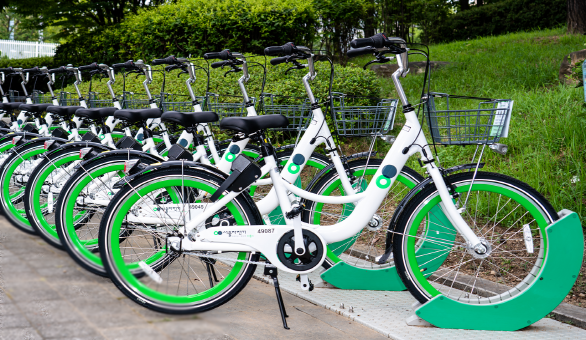

In [189]:
from IPython.display import Image
Image(filename='bi.png')

## <center><strong> Project Overview </strong></center>

### Bike share systems are a way to rent bikes where the process of obtaining membership, renting and returning bikes is automated through a network of kiosks located throughout the city. Through these systems, people can rent a bike from one location and return it to another location based on their needs. Currently, there are more than 500 bike share programs around the world.

---------------------------------
---------------------------------
---------------------------------

## **Import Libraries** 

In [190]:
import pylab
import calendar

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import math
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image


pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

----------------------------------
----------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

In [191]:
df = pd.read_csv("vlib.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [192]:
df.shape

(10886, 12)

In [193]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [195]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [196]:
df.duplicated().sum()

np.int64(0)

-----------------------

### **Basic Statistical Overview**
- Summary Statistical : **describe()**

In [197]:
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False).style.background_gradient(cmap='GnBu').bar(subset=["max"], color='#BB0000').bar(subset=["mean",], color='green') 

,count,mean,std,min,25%,50%,75%,max
registered,10886.000000,155.552177,151.039033,0.000000,36.000000,118.000000,222.000000,886.000000
casual,10886.000000,36.021955,49.960477,0.000000,4.000000,17.000000,49.000000,367.000000
humidity,10886.000000,61.886460,19.245033,0.000000,47.000000,62.000000,77.000000,100.000000
atemp,10886.000000,23.655084,8.474601,0.760000,16.665000,24.240000,31.060000,45.455000
windspeed,10886.000000,12.799395,8.164537,0.000000,7.001500,12.998000,16.997900,56.996900
temp,10886.000000,20.230860,7.791590,0.820000,13.940000,20.500000,26.240000,41.000000
season,10886.000000,2.506614,1.116174,1.000000,2.000000,3.000000,4.000000,4.000000
weather,10886.000000,1.418427,0.633839,1.000000,1.000000,1.000000,2.000000,4.000000
workingday,10886.000000,0.680875,0.466159,0.000000,0.000000,1.000000,1.000000,1.000000
holiday,10886.000000,0.028569,0.166599,0.000000,0.000000,0.000000,0.000000,1.000000


In [198]:
df.select_dtypes(include='object').describe()

,datetime
count,10886
unique,10886
top,2012-12-19 23:00:00
freq,1


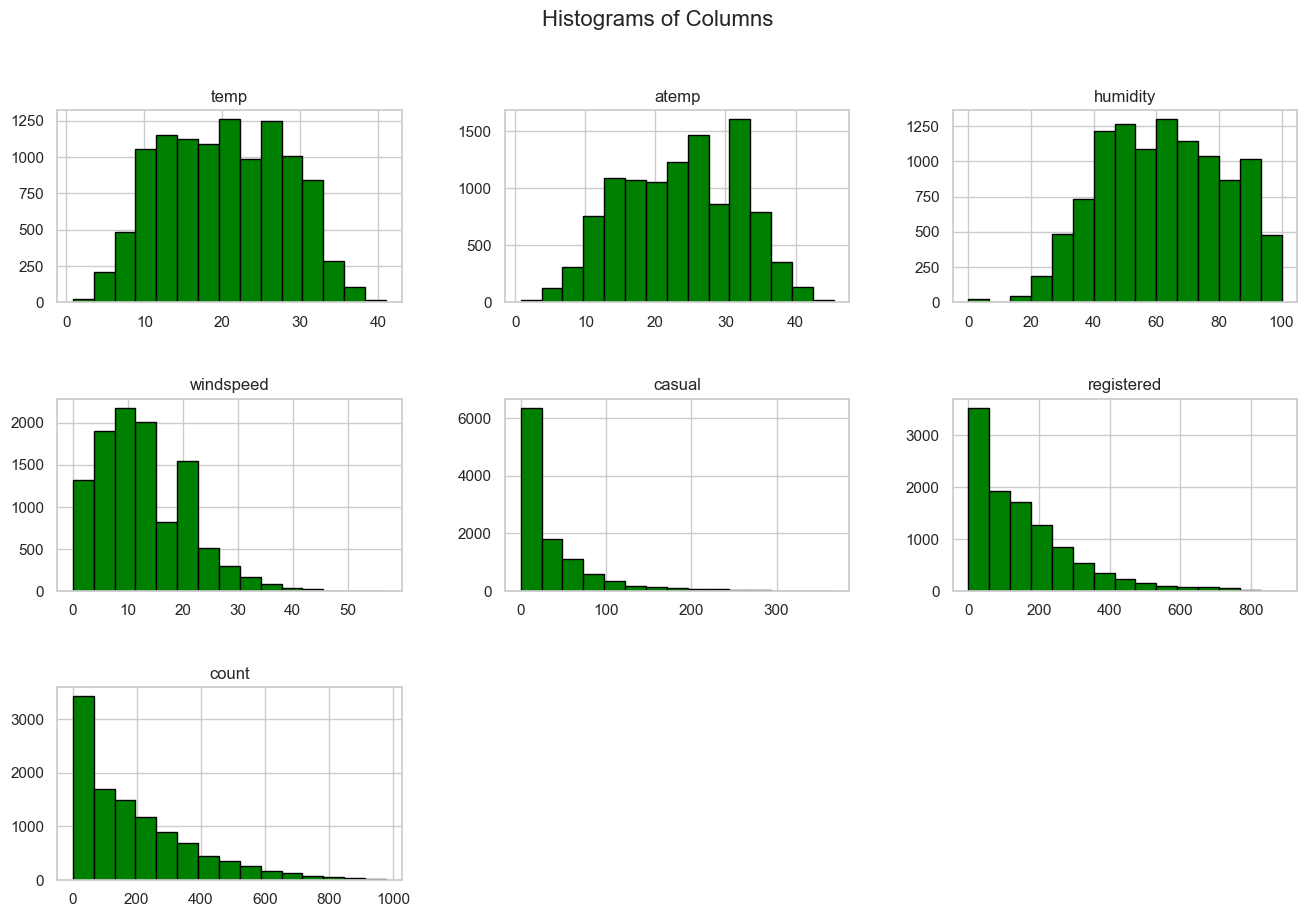

In [199]:
df.drop(['datetime','season','holiday','workingday','weather'],axis=1).hist(bins=15, figsize=(16, 10), color='green', edgecolor='black')

# Set titles and labels for each subplot
plt.suptitle('Histograms of Columns', fontsize=16)
plt.subplots_adjust(hspace=0.5)  # Add space between plots
plt.show()

-----------------------

- Summary Statistical : **value_counts()**

In [200]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [201]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

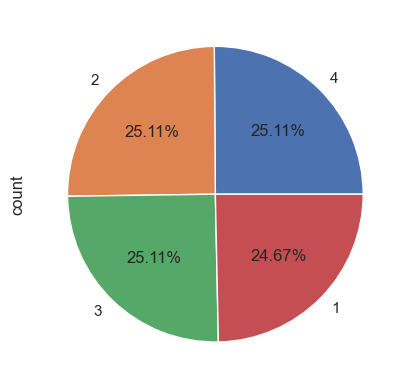

In [202]:
df['season'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

--------------------------

In [203]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

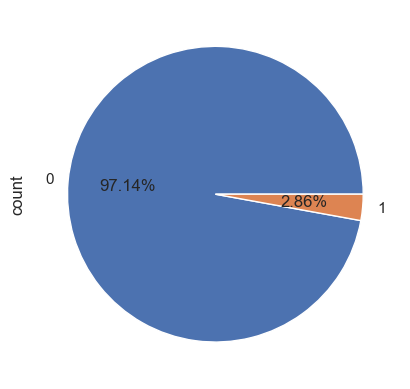

In [204]:
df['holiday'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

-------------------
------------------

In [205]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

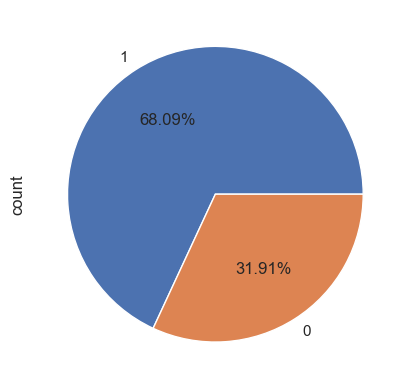

In [206]:
df['workingday'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

-----------------------

In [207]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

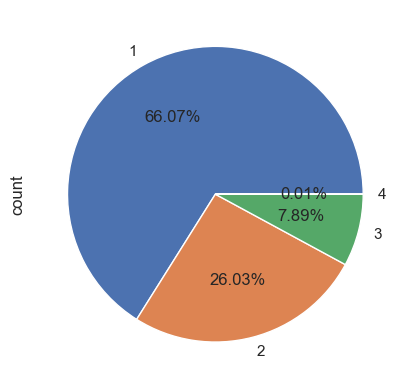

In [208]:
df['weather'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

----------------------
----------------------

## **Distribution of Variables**

- **Numerical Features (KDE)**

In [209]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

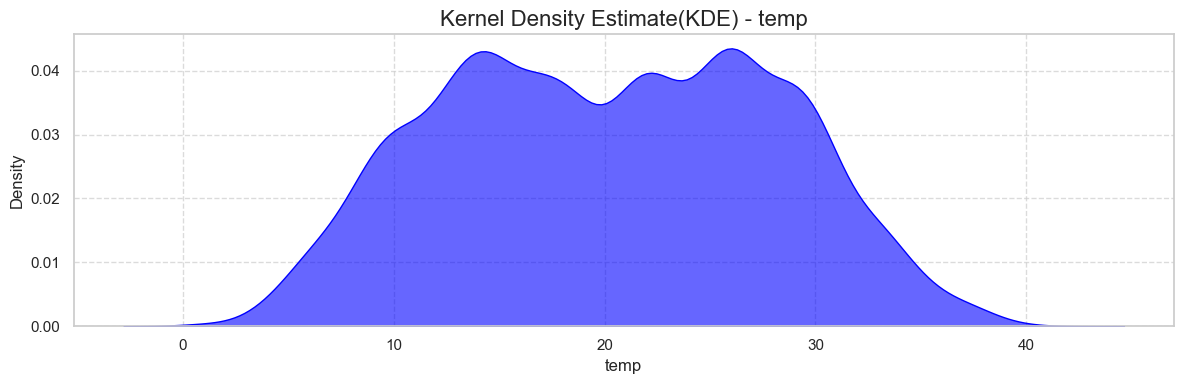

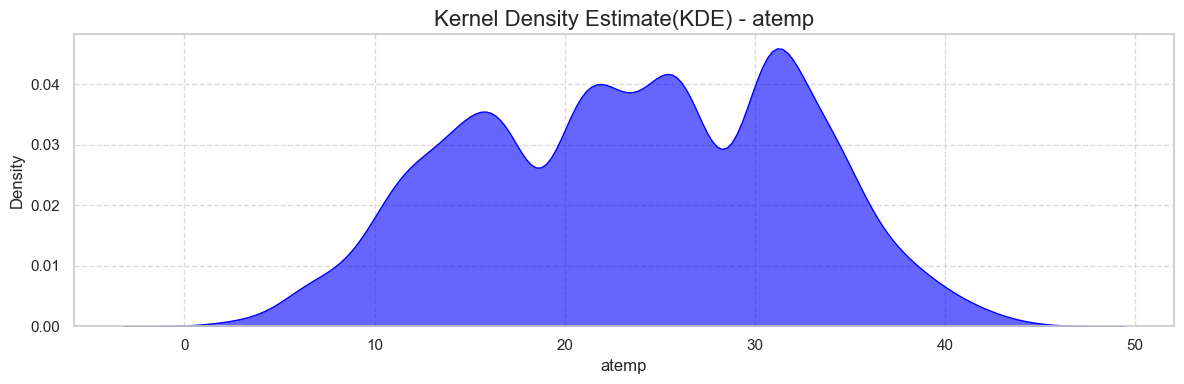

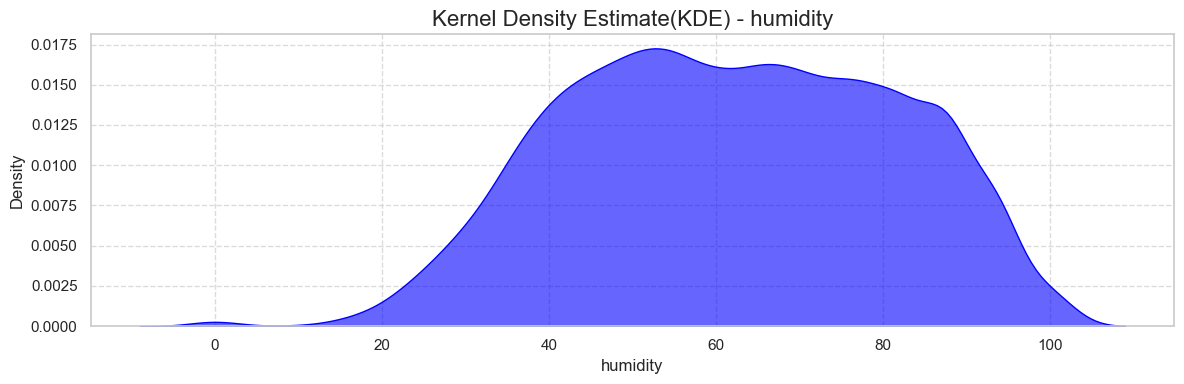

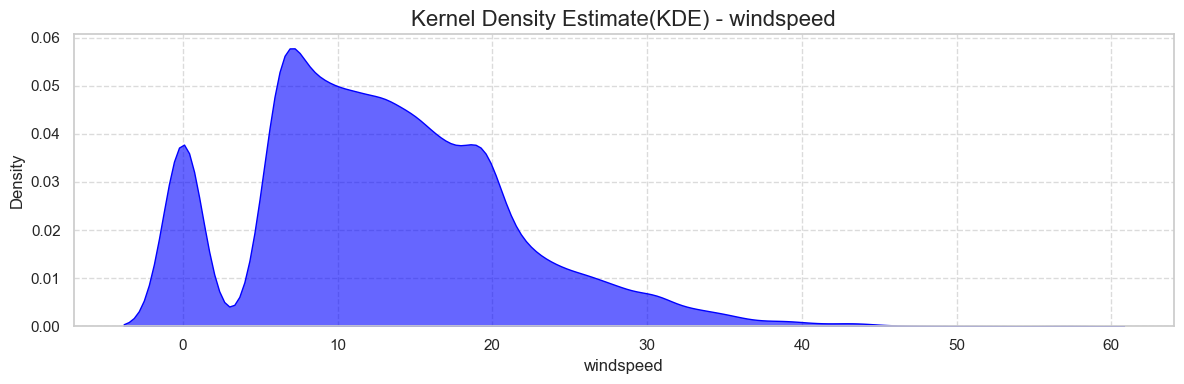

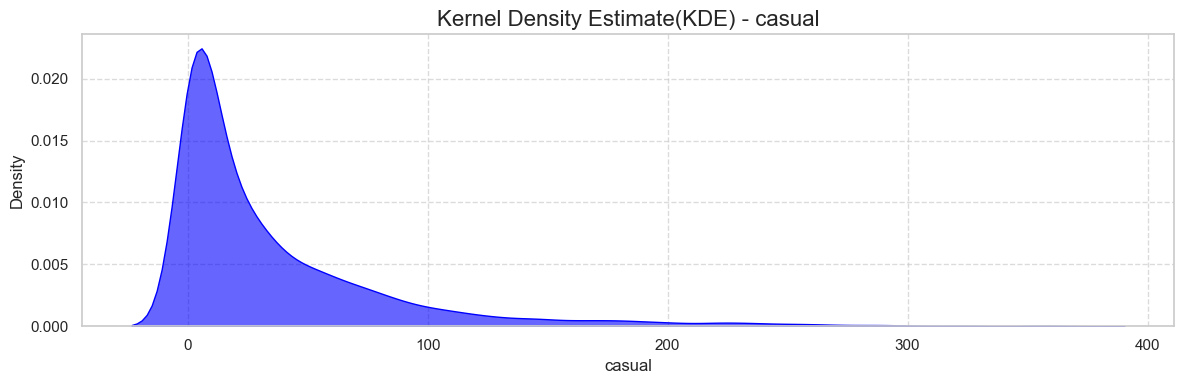

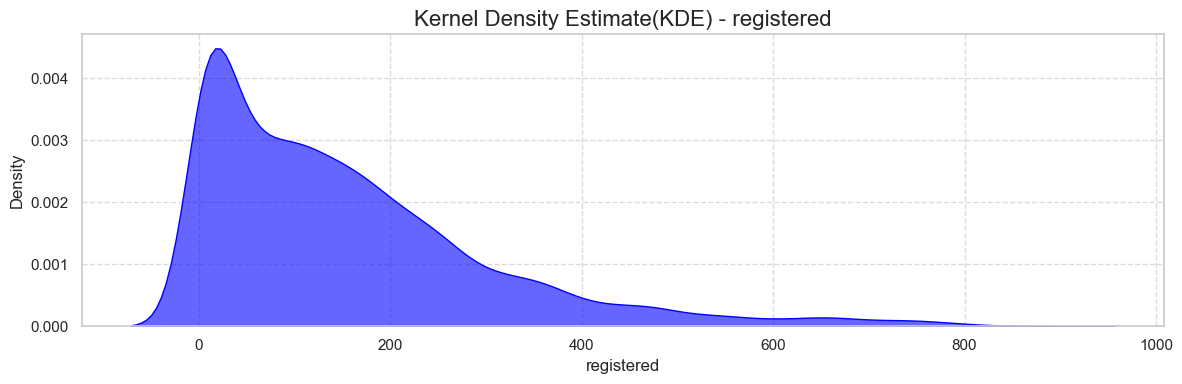

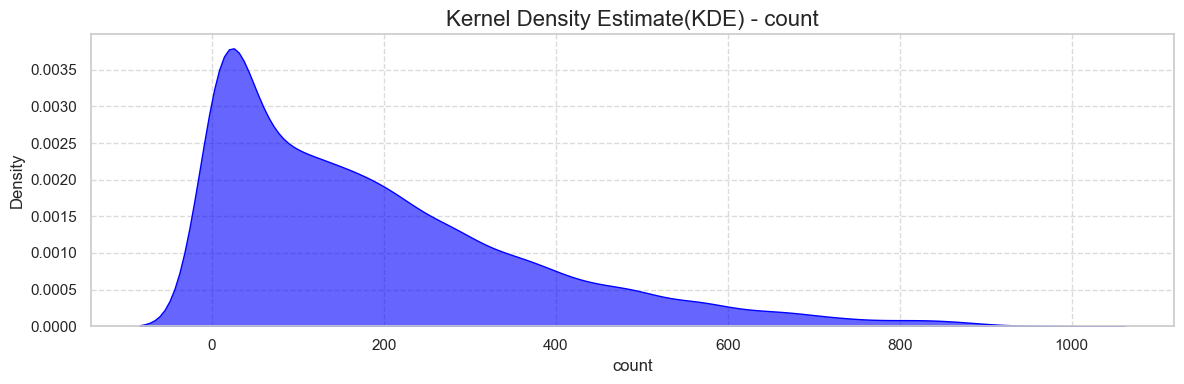

In [210]:
sns.set(style="whitegrid")
for	col	in df.drop(['datetime','season','holiday','workingday','weather'],axis=1).select_dtypes('number').columns:
    plt.figure(figsize=(12,	4))
    sns.kdeplot(df[col], fill=True,	color='blue', alpha=0.6)
    plt.title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
    plt.xlabel(col,	fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

----------------------------

### **Correlation**

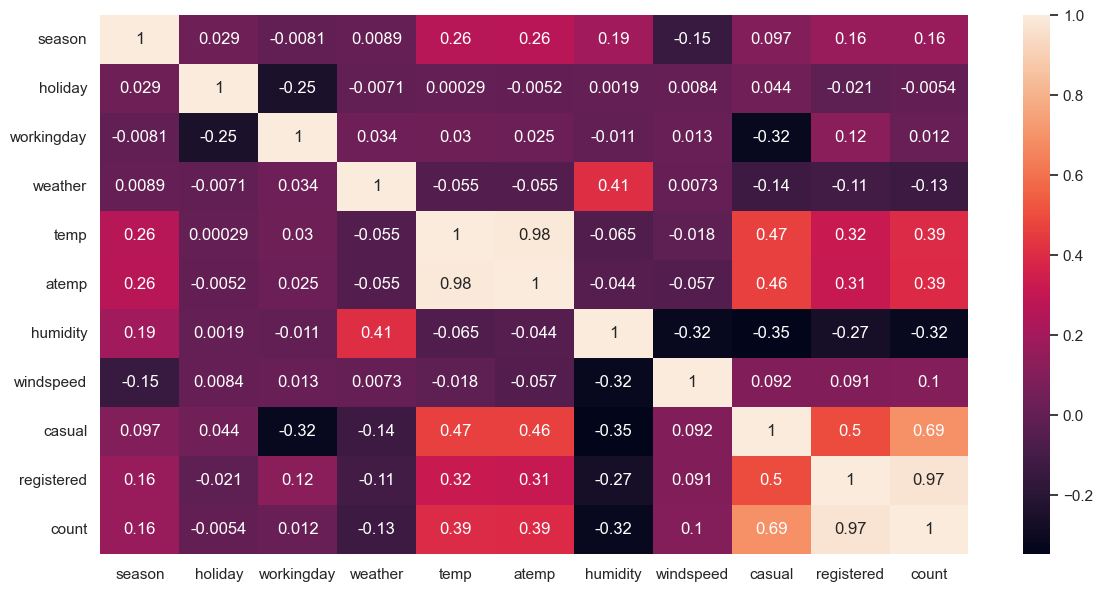

In [211]:
plt.figure(figsize=(14,	7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()


##### There is a high positive correlation (0.97) between **registered** and **count**

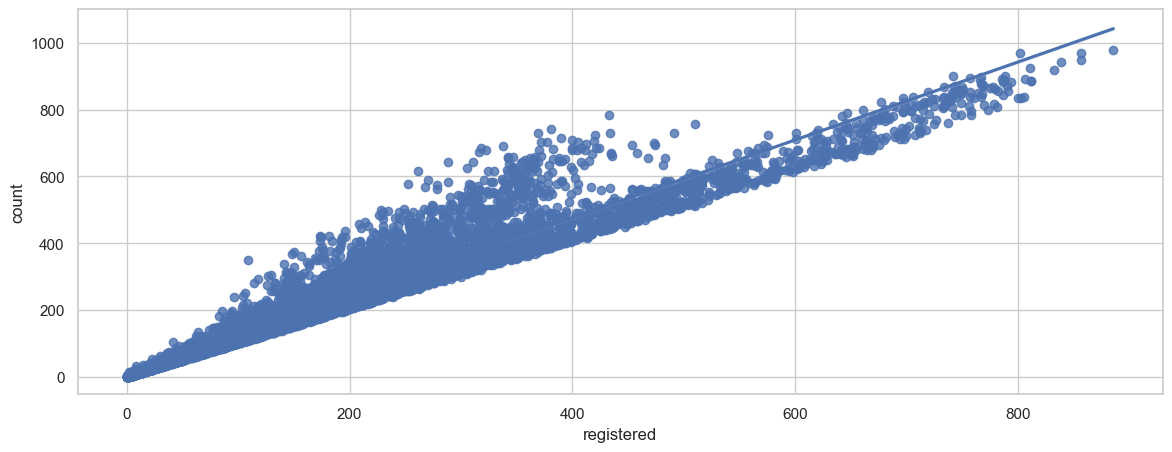

In [212]:
fig,ax = plt.subplots()
fig.set_size_inches(14, 5)
sns.regplot(x="registered", y="count", data=df,ax=ax)
plt.show()

-----------------------

##### There is a high positive correlation (0.69) between **casual** and **count**

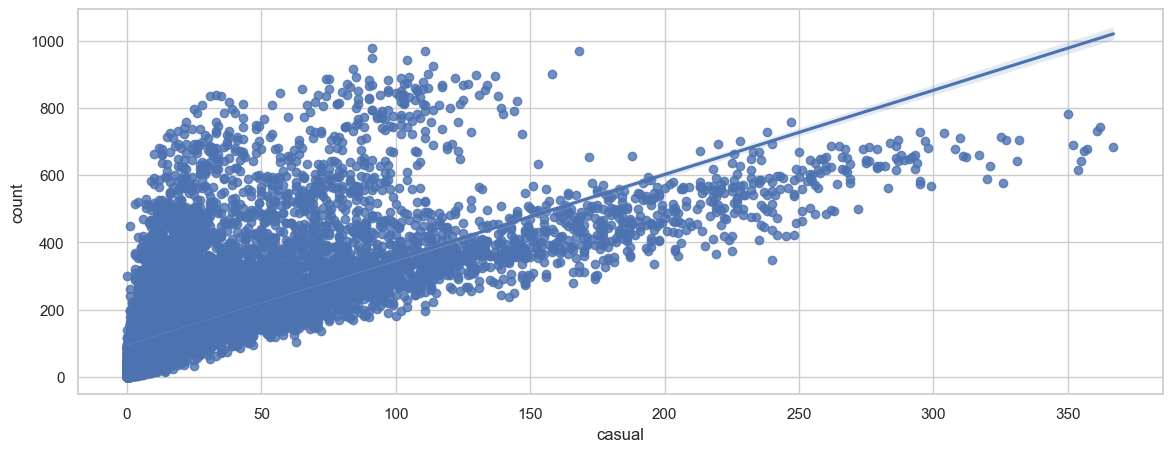

In [213]:
fig,ax = plt.subplots()
fig.set_size_inches(14, 5)
sns.regplot(x="casual", y="count", data=df,ax=ax)
plt.show()

--------------------

##### There is a high positive correlation (0.98) between **temp** and **atemp**

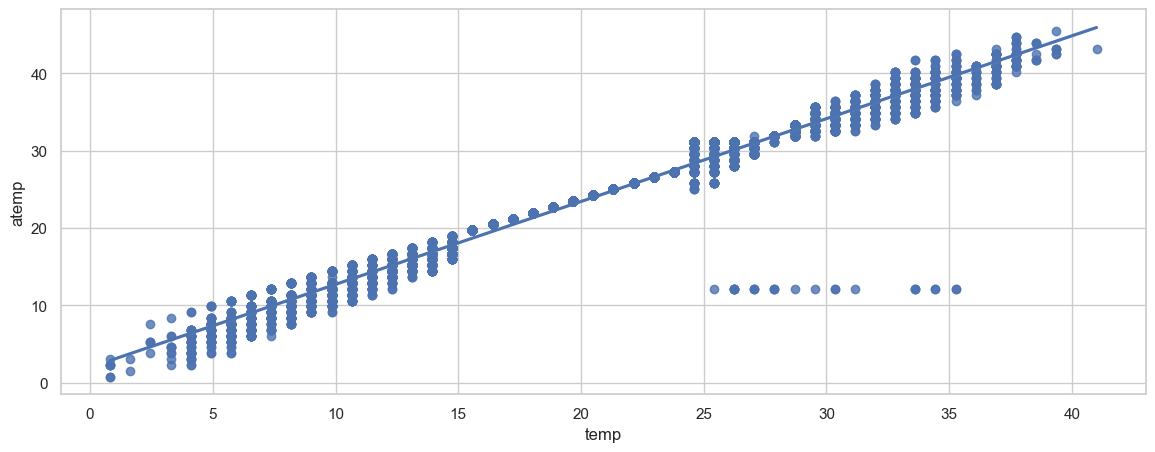

In [214]:
fig,ax = plt.subplots()
fig.set_size_inches(14, 5)
sns.regplot(x="temp", y="atemp", data=df,ax=ax)
plt.show()

-------------------------
-------------------------

## **Detect Outliers**

In [215]:
df[['count','registered','casual']].describe()

,count,registered,casual
count,10886.000000,10886.000000,10886.000000
mean,191.574132,155.552177,36.021955
std,181.144454,151.039033,49.960477
min,1.000000,0.000000,0.000000
25%,42.000000,36.000000,4.000000
50%,145.000000,118.000000,17.000000
75%,284.000000,222.000000,49.000000
max,977.000000,886.000000,367.000000


<Axes: ylabel='count'>

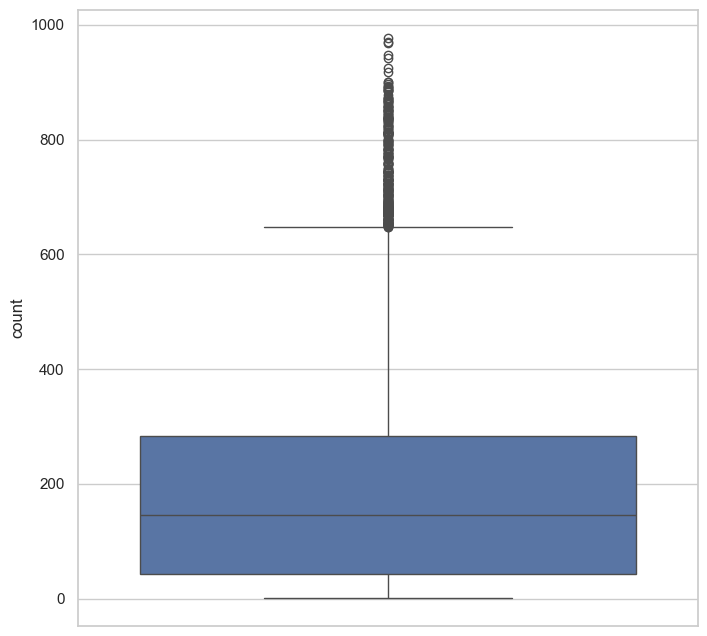

In [216]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data=df,y="count",orient="v",ax=axes)

In [217]:
numerical_data=df[['casual','registered','count']]
for column in numerical_data.columns:
    Q1=numerical_data[column].quantile(0.25)
    Q3=numerical_data[column].quantile(0.75)
    IQR = Q3-Q1

    Lower_bound = Q1 - 1.5*IQR
    Upper_bound = Q3 + 1.5*IQR

    outliers = ((numerical_data[column]>Upper_bound)|(numerical_data[column]<Lower_bound)).sum()
    Total = numerical_data[column].shape[0]
    print(f'Total of outliers in {column} are   :   {outliers}--{round(100*(outliers)/Total,2)}%')
        
    if outliers > 0:
        df=df.loc[(df[column] <= Upper_bound) & (df[column] >= Lower_bound)]

Total of outliers in casual are   :   749--6.88%
Total of outliers in registered are   :   423--3.89%
Total of outliers in count are   :   300--2.76%


<Axes: ylabel='count'>

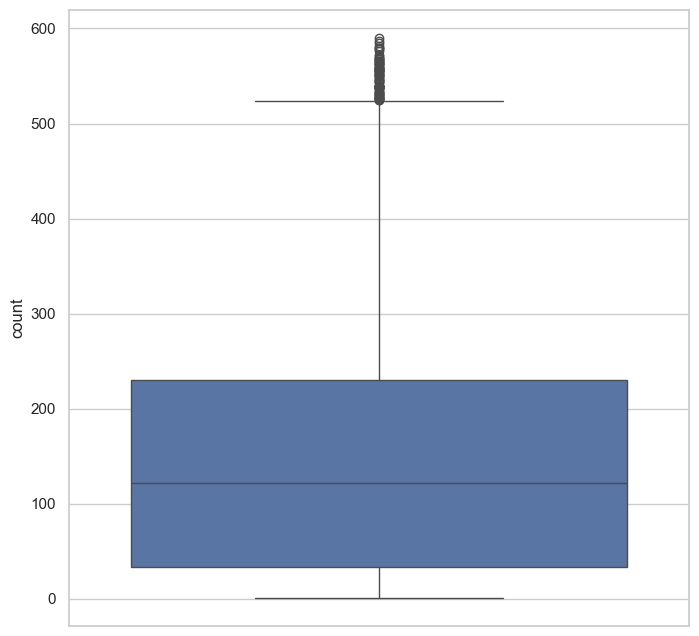

In [218]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data=df,y="count",orient="v",ax=axes)

------------------
-------------------

## **Feature Extraction**

----------------------------

#### Extracting new column **[date]** from **[datetime]**

In [219]:
"2011-01-01 00:00:00".split()

['2011-01-01', '00:00:00']

In [220]:
df['datetime'][0].split()

['2011-01-01', '00:00:00']

In [221]:
df['datetime'][0].split()[0]

'2011-01-01'

In [ ]:
df["date"] = df['datetime'].apply(lambda x : x.split()[0])

In [223]:
df['date'].head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

--------------------

#### Extracting new column **[time]** from **[dateime]**

In [224]:
df['datetime'][0].split()

['2011-01-01', '00:00:00']

In [225]:
df['datetime'][0].split()[1]

'00:00:00'

In [ ]:
df['time'] = df['datetime'].apply(lambda x : x.split()[1])

In [227]:
df['time'].head()

0    00:00:00
1    01:00:00
2    02:00:00
3    03:00:00
4    04:00:00
Name: time, dtype: object

-------------------------------------

#### Extracting new column **[year]** from **[date]**

In [228]:
df['date'][0].split()[0]

'2011-01-01'

In [229]:
df['date'][0].split()[0].split('-')[0]

'2011'

In [ ]:
df['year'] =df['date'].apply(lambda x : x.split()[0].split('-')[0])

In [231]:
df['year'].value_counts()

year
2011    5115
2012    4629
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_15228\1817585652.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette=['green','red'])


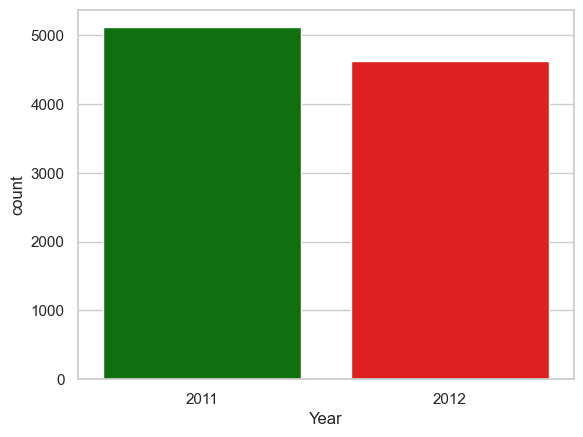

In [232]:
sns.countplot(x='year', data=df, palette=['green','red'])
plt.xlabel('Year')
plt.show()

-------------------------------

#### Extracting new column **[month]** from **[date]**

In [233]:
df['date'][0].split()[0].split('-')[1]

'01'

In [ ]:
df['date'].apply(lambda x : calendar.month_name[datetime.strptime(x,"%Y-%m-%d").month])

0         January
1         January
2         January
3         January
4         January
           ...   
10881    December
10882    December
10883    December
10884    December
10885    December
Name: date, Length: 9744, dtype: object

In [ ]:
df["month"] = df['date'].apply(lambda x : calendar.month_name[datetime.strptime(x,"%Y-%m-%d").month])

In [236]:
df['month'].head()

0    January
1    January
2    January
3    January
4    January
Name: month, dtype: object

In [237]:
df['month'].value_counts()

month
February     886
January      879
December     871
November     837
March        835
May          797
April        794
August       794
October      785
July         763
June         755
September    748
Name: count, dtype: int64

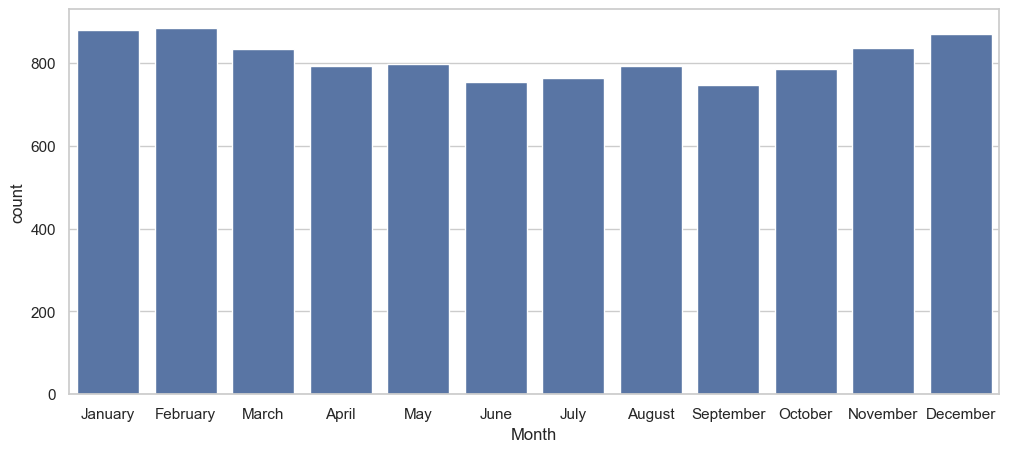

In [238]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sns.countplot(x='month', data=df)
plt.xlabel('Month')
plt.show()

------------------------

#### Extracting new column **[day]** from **[date]**

In [239]:
df['date'][0].split()[0].split('-')[2]

'01'

In [ ]:
df['date'].apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: date, Length: 9744, dtype: object

In [ ]:
df["day"] = df['date'].apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

In [242]:
df["day"].head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: day, dtype: object

In [243]:
df["day"].value_counts()

day
Thursday     1457
Friday       1446
Tuesday      1444
Wednesday    1438
Monday       1433
Sunday       1278
Saturday     1248
Name: count, dtype: int64

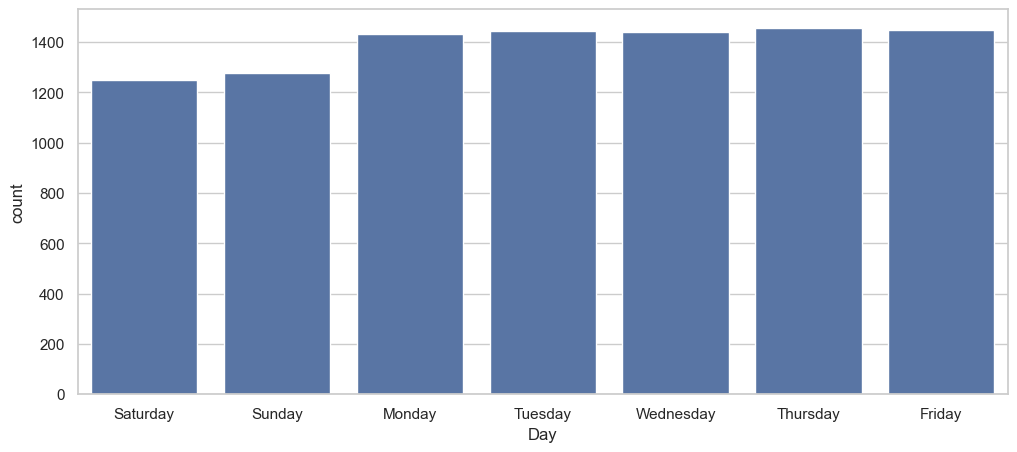

In [244]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sns.countplot(x='day', data=df)
plt.xlabel('Day')
plt.show()

------------------------

#### Extracting new column **[weekend]** from **[day]**

In [245]:
def WeekEnd(day):
    day = str(day)
    if day == 'Saturday' or day == 'Sunday':
        return 'Yes'
    else:
        return 'No'

df['weekend'] = df['day'].apply(lambda x : WeekEnd(x))

In [246]:
df['weekend'].value_counts()

weekend
No     7218
Yes    2526
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_15228\4175082854.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekend', data=df, palette=['green','red'])


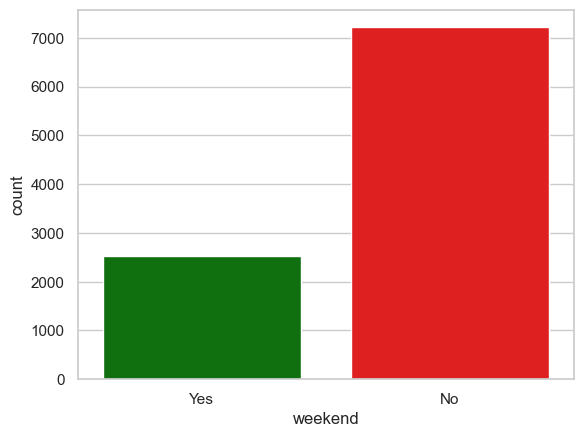

In [250]:
sns.countplot(x='weekend', data=df, palette=['green','red'])
plt.show()

------------------------

#### Extracting new column **[hour]** from **[time]**

In [258]:
df['time'][0]

'00:00:00'

In [263]:
df['time'][0].split(':')[0]

'00'

In [264]:
df['time'].apply(lambda x : x.split(":")[0])

0        00
1        01
2        02
3        03
4        04
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: time, Length: 9744, dtype: object

In [265]:
df["hour"] = df['time'].apply(lambda x : x.split(":")[0])

In [266]:
df['hour'].value_counts()

hour
23    456
00    455
22    455
06    455
01    454
21    454
09    453
05    452
02    448
20    446
07    445
04    442
03    433
10    415
19    396
11    388
12    375
16    371
13    366
15    363
14    356
08    331
18    290
17    245
Name: count, dtype: int64

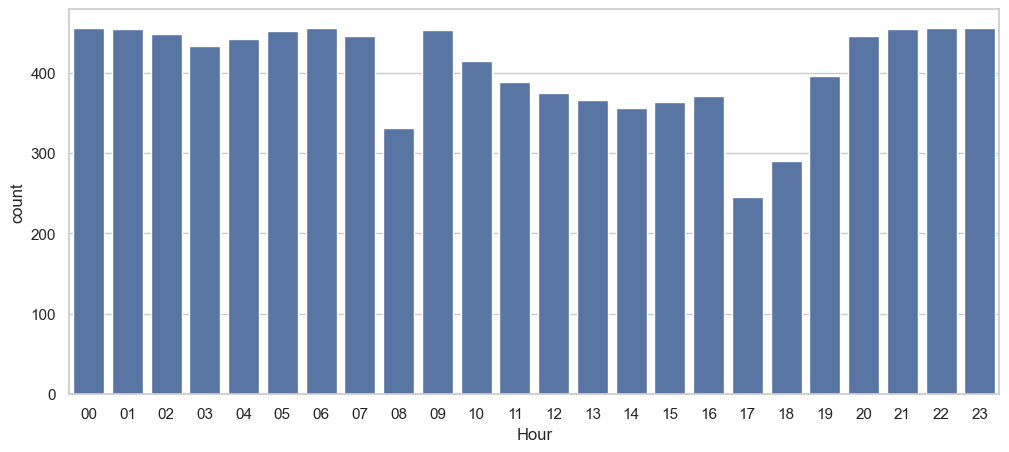

In [267]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sns.countplot(x='hour', data=df)
plt.xlabel('Hour')
plt.show()

In [ ]:
# morning and evening

In [248]:
# !jupyter nbconvert --to html "Bake rental project.ipynb"